In [1]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.predict(X_test[1:2])
reg.score(X_test, y_test)

X

array([[-1.5415874 ,  0.22739278, -1.35338886, ...,  0.86727663,
         0.40520408, -0.06964158],
       [-1.02125401,  0.39232256,  0.42971434, ..., -0.75693055,
         1.5038265 , -0.036413  ],
       [ 0.65880214, -0.65276145, -1.18488744, ..., -0.91798431,
        -0.04648116, -1.21868383],
       ...,
       [-0.09834549, -1.2550679 , -0.04217711, ..., -0.41783444,
         0.31709817,  0.60367669],
       [ 0.32099947, -1.12658943, -0.33945432, ...,  1.60286363,
         0.27623985, -0.67832984],
       [ 1.83708069, -0.00296475,  1.80144921, ...,  0.11230769,
         0.33109242,  1.51848293]])

In [2]:
y

array([ 5.89981499e+01, -1.51472301e+02,  3.92774675e+00,  1.30275835e+02,
        2.04728060e+00,  1.01587138e+02, -1.81389163e+02, -1.99827729e+02,
        2.36839440e+02,  3.00206479e+02,  2.71801441e+01,  2.76530071e+01,
        4.44317863e+01, -2.97416896e+01, -1.65646056e+02,  1.06302533e+02,
       -2.38325493e+02, -1.27217684e+02, -1.49696870e+02,  3.91961166e+01,
       -3.38549645e+00,  1.44280015e+02, -6.77946699e+01, -8.78067763e+01,
        2.59043702e+02, -1.98514664e+02,  1.24378523e+01, -7.03056179e+01,
        1.53948181e+02, -1.12712395e+02,  6.01916320e+01, -1.02364589e+02,
        8.02760399e+01, -2.54989466e+02, -2.65026472e+01,  8.45554208e+01,
       -7.86065692e+01,  6.59383309e+00, -8.40267190e+01, -1.88440481e+02,
       -1.05322661e+02, -1.48609151e+02,  3.19325058e+02, -1.03811985e+01,
       -1.66106829e+02, -1.92127360e+00, -1.66459184e+02,  2.22568255e+02,
       -1.90733117e+02, -4.47361111e+00, -1.40862199e+02, -1.04998874e+02,
       -1.55406951e+02,  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# 加载数据
boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
# 设置参数
# 1、迭代次数 2、最⼤深度 3、最⼩样本数 4、学习率 5、损失函数(最⼩⼆乘)
params = {
    'n_estimators': 500,
    'max_depth': 4,
    'min_samples_split': 0.5,
    'learning_rate': 0.01
}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 15.3039


Text(0, 0.5, 'Deviance')

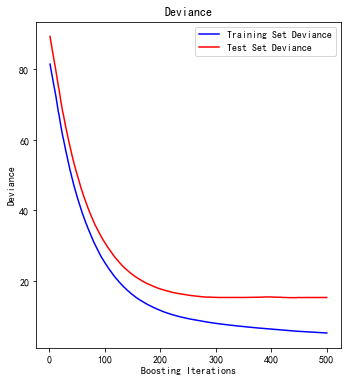

In [5]:
# 训练误差
# 测试误差
test_score = np.zeros((params['n_estimators'], ), dtype=np.float64)
# staged_predict():预测每⼀轮迭代后输⼊样本的预测值
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1,
         clf.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1,
         test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [6]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

In [7]:
import gzip
import pickle as pkl
from sklearn.model_selection import train_test_split

def load_data(path):
    f = gzip.open(path, 'rb')
    train_set, valid_set, test_set = pkl.load(f, encoding='latin1')
    f.close()
    return (train_set, valid_set, test_set)

path = 'mnist.pkl.gz'
train_set, valid_set, test_set = load_data(path)
Xtrain, _, ytrain, _ = train_test_split(train_set[0], train_set[1], test_size=0.9)
Xtest, _, ytest, _ = train_test_split(test_set[0], test_set[1], test_size=0.9)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(5000, 784) (5000,) (1000, 784) (1000,)


In [8]:
ytrain

array([0, 2, 2, ..., 0, 8, 4], dtype=int64)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import time

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1,max_depth=3)
start_time = time.time()
clf.fit(Xtrain, ytrain)
end_time = time.time()
print('The training time = {}'.format(end_time - start_time))

# prediction and evaluation
pred = clf.predict(Xtest)
accuracy = np.sum(pred == ytest) / pred.shape[0]
print('Test accuracy = {}'.format(accuracy))

The training time = 34.48551034927368
Test accuracy = 0.836


0.0354569936370468 0.0


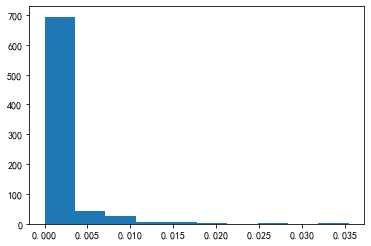

In [10]:
# 查看特征重要性
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(clf.feature_importances_)
print(max(clf.feature_importances_), min(clf.feature_importances_))